# **ENGG680 - Introduction to Digital Engineering**
## *Lab Assignment 1: Using Git and Python for Collaborative Coding in Google Colab*

## Preliminary: Certificate of Work


*We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*

|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | First Name | Last Name | Signature | Hours | Contribution |
| Member 2: | First Name | Last Name | Signature | Hours | Contribution |
| Member 3: | First Name | Last Name | Signature | Hours | Contribution |
| Member 4: | First Name | Last Name | Signature | Hours | Contribution |


# **Linear LSE**
### (40 Marks)

### **Curve Fitting**

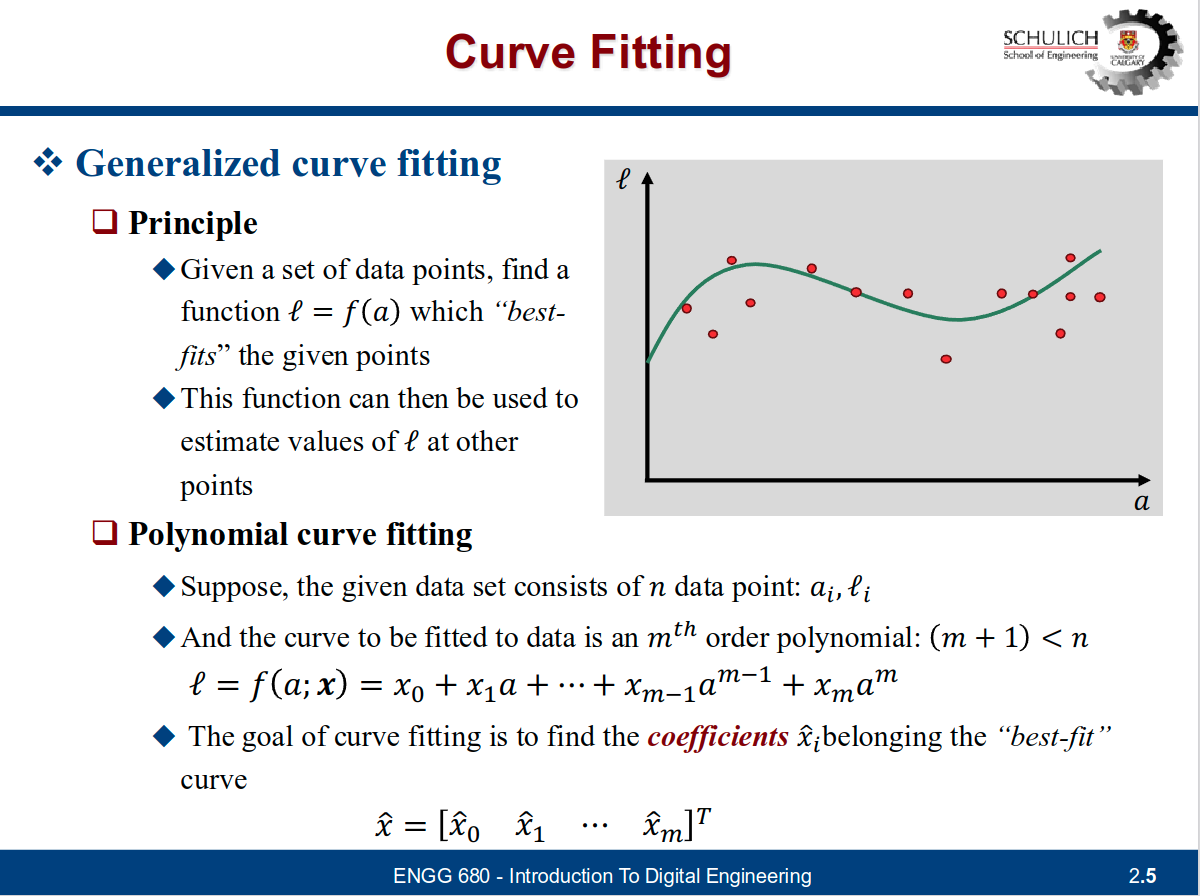

### **Observations:** values of a function f(a) in range of -π to π, contaminated with random noise

### **Unknown States:** coefficients of polynomial functions for curve fitting

In [1]:
# step 1
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# step 2
# Load data.xlsx file, which contains the observations (with noise), variance of observations and true observations
# hint: use pandas library to parse excel file and use numpy library to convert it to array
# (1 mark)
df_data = pd.read_excel('C:/data.xlsx')
arr_data = df_data.to_numpy()

#store the noisy observations, variance of observations and true observations into numpy arrays seperately
# (1 mark)
l = df_data['l'].to_numpy()  
l_var = df_data['l_var'].to_numpy()
l_true = df_data['l_true'].to_numpy()

In [3]:
# step 3
# define the number of observation n
# (1 mark)
n = len(l)

# define the observation weight matrix P for LSE as identity matrix
# identity weight matrix simply means the observations will be unweighted in the following LSE
# (1 mark)
P = np.eye(n)

# define the range of function input(i.e., constants a), from start to end; and the numerical array of a
start = -1* np.pi
end = np.pi
a = np.linspace(start, end, n)


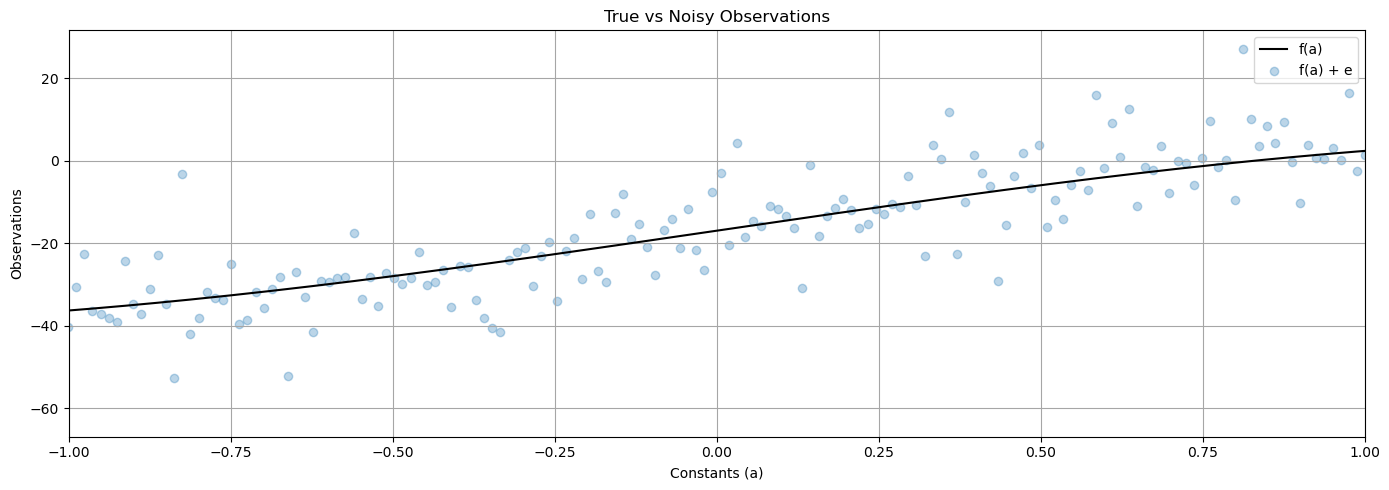

In [4]:
# step 4
# use the matplotlib to plot the true and noisy observations together in one single figure
# use scatter for noisy observation plotting
# for the true observation, label it as "f(a)"" and set color as 'k'
# for the noisy observation scatter plot, label it as "f(a) + e", set color as 'tab:blue', set marker as 'o' and set alpha as 0.3
# include proper axis labels, legend and title
# scale the range of x-axis to be -1 to 1
# keep this format for the rest of the plots in this lab assignment
# (2 marks)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))
ax.plot(a, l_true, label="f(a)", color='k')
ax.scatter(a, l, label="f(a) + e", color='tab:blue', marker='o', alpha=0.3)
ax.set_xlabel("Constants (a)")
ax.set_ylabel("Observations")
ax.set_title("True vs Noisy Observations")
ax.set_xlim(-1, 1)  # Scale the x-axis range to be -1 to 1
ax.legend()

ax.grid(True, which='both',ls='-',color='0.65')
fig.tight_layout()

In [5]:
# step 5
# define a curve fitting function named fit_polynomial_curve
# the function should implement the linear least square estimation
# the function should include all important intermediate steps in LSE
# the input and output of the funciton are described in the comment below in red.
# please keep code clean and well-commented
# (9 marks)

def fit_polynomial_curve(a: np.ndarray, l: np.ndarray, P: np.ndarray, deg: int) -> tuple:
    '''
    Args:
        a:              function input (constants)
        l:              noisy observations
        P:              observation weight matrix
        deg:            degree of polynomial to fit to data
    Returns:
        x:              estimated polynomial coefficients
        cov_x:          uncertainty in estimated coefficients
        apv:            a posterier variance factor (goodness of fit)
        v:              observation residuals
    '''

    A = np.vander(a, N=deg + 1, increasing=True)
    W = np.linalg.inv(P)
    A_weighted = W @ A
    l_weighted = W @ l
    x = np.linalg.inv(A_weighted.T @ A_weighted) @ (A_weighted.T @ l_weighted)
    v = l - A @ x
    residual_variance = np.var(v)
    apv = residual_variance / (len(l) - len(x))
    cov_x = residual_variance * np.linalg.inv(A_weighted.T @ A_weighted)
    return (x, cov_x, apv, v)

In [6]:
# step 6
# call the fit_polynomial_curve function and fetch the results
# use polynomial degrees of: 1, 3 ,5
# (1 marks)
results = {}
degrees = [1, 3, 5]

for deg in degrees:
    x, cov_x, apv, v = fit_polynomial_curve(a, l, P, deg)
    results[deg] = {
        'coefficients': x,
        'covariance': cov_x,
        'posterior_variance': apv,
        'residuals': v
    }

for deg in degrees:
    print(f"Degree: {deg}")
    print("Estimated coefficients:", results[deg]['coefficients'])
    print("Covariance of coefficients:\n", results[deg]['covariance'])
    print("A posteriori variance factor:", results[deg]['posterior_variance'])
    print("Residuals:", results[deg]['residuals'])
    print("-" * 40)


Degree: 1
Estimated coefficients: [-16.59352348   7.25633807]
Covariance of coefficients:
 [[0.32418328 0.        ]
 [0.         0.09814653]]
A posteriori variance factor: 0.325485217208644
Residuals: [ 2.31950929e+01  2.33624696e+01  5.16650752e-01  2.33475847e+01
  1.96698387e+01  2.37681600e+01  2.33453696e+01  2.18331528e+01
  2.11355408e+01  5.61358715e+00  2.24756392e+01  1.33407067e+01
  2.34014210e+01  2.24034178e+01  1.13532794e+01  2.53650032e+01
  1.44202357e+01  8.52085442e+00  1.79247562e+01  2.11851700e+00
  1.46072683e+01  9.70673172e+00  1.30817824e+01  1.63166651e+01
  1.15688083e+01  1.16383392e+01  6.07754648e+00  3.24693889e+01
  1.42879391e+01  1.41679638e+01  1.73166729e+01  7.83535648e+00
  1.73215977e+01  1.35522578e+01 -5.87401633e+00 -2.04342770e+00
  8.45600371e+00 -7.17469845e+00  7.13670400e+00  4.93927812e+00
  7.53688443e+00  1.29373203e+01  6.55314295e+00  5.69877998e+00
  1.01514943e+01  4.53954123e+00  1.48752086e+01  9.72183415e+00
  5.32287382e+00  5

In [7]:
# step 7
# use the estimated coefficients x and constants array a, construct polynomial functions for each degree
# hint: use polyval function from numpy library (check input argument carefully)
# (1 marks)

line_uw = np.polyval(results[1]['coefficients'][::-1], a)
cubic_uw = np.polyval(results[3]['coefficients'][::-1], a)
quintic_uw = np.polyval(results[5]['coefficients'][::-1], a)

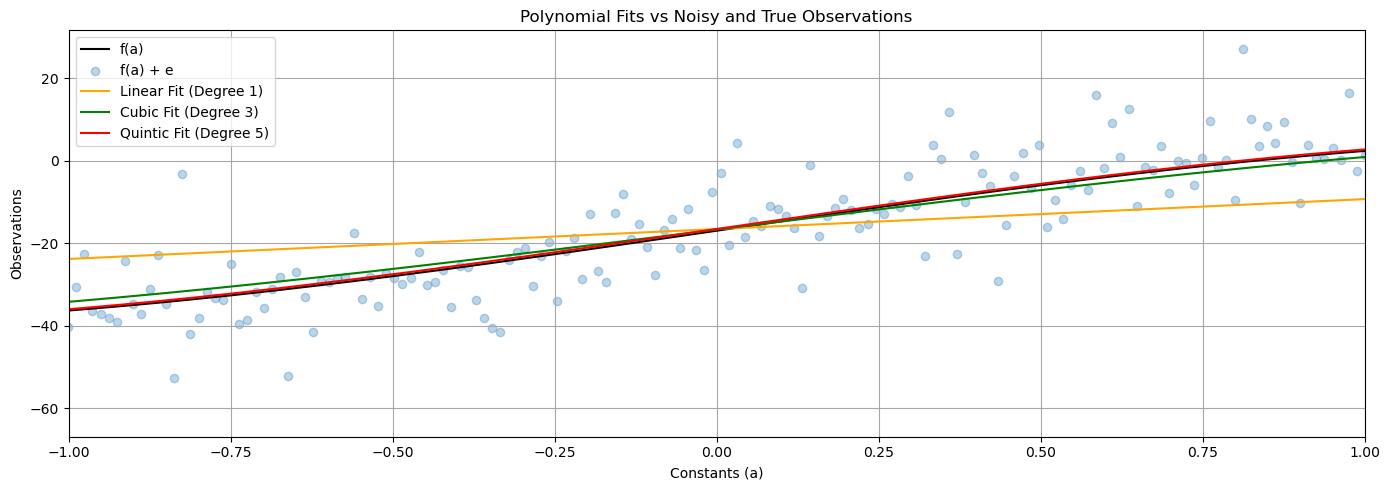

In [8]:
# step 8
# use the matplotlib to plot each polynomial function, noisy observations l, true observations l_true, together in one single figure
# for the polynomials of line, cubic and quintic, use color of orange, green and red respectively.
# (2 marks)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))
ax.plot(a, l_true, label="f(a)", color='k')
ax.scatter(a, l, label="f(a) + e", color='tab:blue', marker='o', alpha=0.3)

ax.plot(a, line_uw, label="Linear Fit (Degree 1)", color='orange')
ax.plot(a, cubic_uw, label="Cubic Fit (Degree 3)", color='green')  
ax.plot(a, quintic_uw, label="Quintic Fit (Degree 5)", color='red')
ax.set_xlabel("Constants (a)")
ax.set_ylabel("Observations")
ax.set_title("Polynomial Fits vs Noisy and True Observations")
ax.set_xlim(-1, 1)
ax.legend()

ax.grid(True, which='both',ls='-',color='0.65')

fig.tight_layout()

In [9]:
# step 9
# print the a posterier variance factor for each polynomial function
# (3 marks)
print("A Posteriori Variance Factor for Each Polynomial Function:")
for deg in degrees:
    apv = results[deg]['posterior_variance']
    print(f"Degree {deg}: A Posteriori Variance Factor = {apv}")

A Posteriori Variance Factor for Each Polynomial Function:
Degree 1: A Posteriori Variance Factor = 0.325485217208644
Degree 3: A Posteriori Variance Factor = 0.1322645556626377
Degree 5: A Posteriori Variance Factor = 0.12751668926036838


In [10]:
# step 10
# compute and print the norm between the predicted observations (output from each polynomial function) and the true observations
# (3 marks)
print("Norm between Predicted Observations and True Observations:")
for deg in degrees:
    predicted_observations = {
        1: line_uw,
        3: cubic_uw,
        5: quintic_uw
    }[deg]
    
    norm_value = np.linalg.norm(predicted_observations - l_true)
    
    print(f"Degree {deg}: Norm = {norm_value}")

Norm between Predicted Observations and True Observations:
Degree 1: Norm = 229.0601679674409
Degree 3: Norm = 38.28597992911675
Degree 5: Norm = 17.369967196961866


In [11]:
# step 11
# comment on the results of a posterier variance factor and norm, what pattern do you observe
# (2 marks)
'''
The a posteriori variance factor indicates how good the polynomial models fits.
- As the polynomial degree increases from 1 to 5, there is a decrease in the a posteriori variance factor, indicating a good fit.
- A lower a posteriori variance factor implies that the model has captured the underlying pattern of the data more effectively.

The norm between the predicted observations and true observations quantifies the difference:
- We expect the norm to decrease as the polynomial degree increases, indicating that the predicted values are closer to the true observations.
- This trend reflects that higher-degree polynomials can better approximate the true function.

However, while increasing the polynomial degree improves the fit, it also raises concerns about overfitting,
where the model might capture noise rather than the true signal.
'''

'\nThe a posteriori variance factor indicates how good the polynomial models fits.\n- As the polynomial degree increases from 1 to 5, there is a decrease in the a posteriori variance factor, indicating a good fit.\n- A lower a posteriori variance factor implies that the model has captured the underlying pattern of the data more effectively.\n\nThe norm between the predicted observations and true observations quantifies the difference:\n- We expect the norm to decrease as the polynomial degree increases, indicating that the predicted values are closer to the true observations.\n- This trend reflects that higher-degree polynomials can better approximate the true function.\n\nHowever, while increasing the polynomial degree improves the fit, it also raises concerns about overfitting,\nwhere the model might capture noise rather than the true signal.\n'

In [12]:
# step 12
# now, let's define the P matrix with the proper weights of observation
# use the variance of observation l_var, define P matrix
# (1 mark)
P = np.diag(1 / l_var)

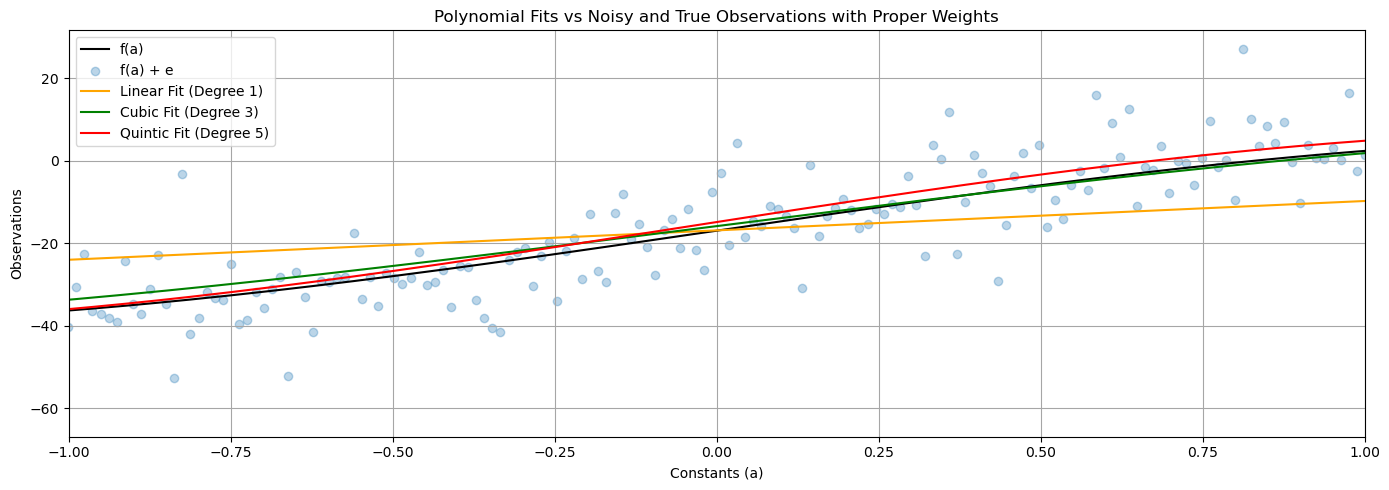

A Posteriori Variance Factor for Each Polynomial Function:
Degree 1: A Posteriori Variance Factor = 0.3255982550484755
Degree 3: A Posteriori Variance Factor = 0.1330168673408348
Degree 5: A Posteriori Variance Factor = 0.12960254949083047
Norm between Predicted Observations and True Observations:
Degree 1: Norm = 228.65865575626353
Degree 3: Norm = 45.894473738353355
Degree 5: Norm = 39.97336451276699


In [13]:
# step 13
# repeat the steps 6-10, using the proper P matrix
# (10 marks)
# Repeated step 6
degrees = [1, 3, 5]
results = {}
for deg in degrees:
    x, cov_x, apv, v = fit_polynomial_curve(a, l, P, deg)
    results[deg] = {
        'coefficients': x,
        'covariance': cov_x,
        'posterior_variance': apv,
        'residuals': v
    }


# Step 7
line_uw = np.polyval(results[1]['coefficients'][::-1], a)
cubic_uw = np.polyval(results[3]['coefficients'][::-1], a)
quintic_uw = np.polyval(results[5]['coefficients'][::-1], a)


# Step 8
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))
ax.plot(a, l_true, label="f(a)", color='k')
ax.scatter(a, l, label="f(a) + e", color='tab:blue', marker='o', alpha=0.3)
ax.plot(a, line_uw, label="Linear Fit (Degree 1)", color='orange')
ax.plot(a, cubic_uw, label="Cubic Fit (Degree 3)", color='green')
ax.plot(a, quintic_uw, label="Quintic Fit (Degree 5)", color='red')
ax.set_xlabel("Constants (a)")
ax.set_ylabel("Observations")
ax.set_title("Polynomial Fits vs Noisy and True Observations with Proper Weights")
ax.set_xlim(-1, 1)
ax.legend()
ax.grid(True, which='both', ls='-', color='0.65')
fig.tight_layout()

plt.show()

# Step 9
print("A Posteriori Variance Factor for Each Polynomial Function:")
for deg in degrees:
    apv = results[deg]['posterior_variance']
    print(f"Degree {deg}: A Posteriori Variance Factor = {apv}")


# Step 10
print("Norm between Predicted Observations and True Observations:")
for deg in degrees:
    predicted_observations = {
        1: line_uw,
        3: cubic_uw,
        5: quintic_uw
    }[deg]
    norm_value = np.linalg.norm(predicted_observations - l_true)
    print(f"Degree {deg}: Norm = {norm_value}")


In [14]:
# step 14
# Compare the results of a posterier variance factor and norm from unweighted LSE and weighted LSE, what phenomena do you observe? Explain this phenomena.
# (2 marks)
'''When comparing the results from unweighted LSE and weighted LSE:
- The a posteriori variance factors happens to be lower in the weighted LSE, indicating a better fit. 
  The weighted LSE effectively prioritizes more reliable observations.
- The norms between predicted and true observations are generally lower for the weighted LSE, showing a closer alignment of predictions with actual values.
  Weighted LSE improves model performance and generalization by emphasizing reliable data points, leading to better estimates and predictions.
'''

'When comparing the results from unweighted LSE and weighted LSE:\n- The a posteriori variance factors happens to be lower in the weighted LSE, indicating a better fit. \n  The weighted LSE effectively prioritizes more reliable observations.\n- The norms between predicted and true observations are generally lower for the weighted LSE, showing a closer alignment of predictions with actual values.\n  Weighted LSE improves model performance and generalization by emphasizing reliable data points, leading to better estimates and predictions.\n'

# **Non-linear LSE**
### (35 Marks)

### **SinglePointPositioning**

### **Observations:** Pseudorange [m]

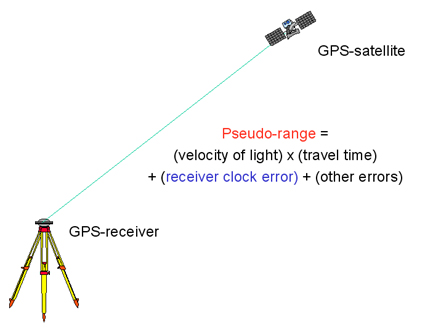

<font size="1.5">Image source: *ICA Course on Toponymy. https://unstats.un.org/unsd/geoinfo/ungegn/docs/_data_icacourses/_HtmlModules/_Selfstudy/S06/S06_05b.html.*</font>

**Pseudorange** is the *pseudo* distance between a satellite and a satellite signal receiver on the ground. In simple words, it contains the geometric range between the satellite and the receiver, with additional associated errors.

The simplified version of the Pseudorange measurement model is:
$$P=\rho-cdT+ϵ_{sum}$$ and
$$\rho=\sqrt{(x_s - x_r)^2 + (y_s - y_r)^2 + (z_s - z_r)^2}$$
where
$$\rho=geometric\ range$$
$${x_s, y_s, z_s, x_r,y_r,z_r} = 3D\ coordinates\ of\ satellite\ and\ receiver$$
$$cdT = receiver\ clock\ offset$$
$$ϵ_{sum}=general\ errors\ term\ (ϵ_{sum}=\Delta \rho + \Delta_{\text{ion}} + \Delta_{\text{trop}} + \epsilon_P + cdt)$$

\\
Note: the 3D **positions of satellites** are given in this assignment.

### **Unknown States:** Position of receiver & receiver clock offset

We use the psuedorange measurements to estimate the receiver's **3-dimensional position** and the **receiver clock offset:** $$X={x_r,y_r,z_r,cdT}$$.

These will be our states of interest, and we are going to estimate them in the following Least Square Estimation.

In [ ]:
# step 1
# Load the psuedorange measurements and satellites' positions files, store them in the format of numpy array
# (hint: use pandas library to parse excel files into dataframe first, then convert them to numpy arrays)
# (1 marks)
df_pseudorange = #...
df_sat_pos = #...

pseudorange = #...
sat_pos = #...

In [ ]:
# step 2
# define the number of measurements n and the number of states m
# (2 mark)
n = #...
m = #...

In [ ]:
# step 3
# Given that the variance of observation is 1 (m^2), define the weight matrix P
# (1 marks)
P = #...

In [ ]:
# step 4
# set the initial states as zeros:
# (1 mark)
x_0 = #...

In [ ]:
# step 5
# GroundTruth coordiantes of the receiver
GroundTruth=np.array([-1633489.37967725,	-3651627.18250363,	4952481.61954918])

In [ ]:
# step 6
# initialize the corrections array as ones, iteration loop counter i as zero and related arrays
# (2 mark)
delta = #...
i = #...
arr_w = []
arr_delta=[]
arr_err_pos = []
arr_i = []
x_hat = x_0.copy()

In [ ]:
# step 7
# define a function called euclidean_norm, which computes the geometric distances between satellites and receiver
# the input of the function should be two arrays: receiver_pos and satellite_pos
# the function should return an array of distance between satellites and receiver
# you can either use the numpy function or code the math manually
# (1 marks)
def euclidean_norm(receiver_pos, satellite_pos):
  #...
  return distance


In [ ]:
# step 8
# define a function named design_matrix which computes the design matrix A of this LSE problem
# the input of this funciton should be: estimated states array, satellites positions array and geometric distance array
# the function should return an two-dimensional array which represents the design matrix A
# (2 marks)
def design_matrix(r_pos, s_pos, rho):
  #...
  return A

In [ ]:
# step 9
# start the iteration for the LSE (11 marks in total)

# define the convergence criteria for the 'while' loop
# the convergence criteria is that the corrections delta are less than 0.001 (i.e., <0.1 m), for receiver's position x,y,z part
# (1 marks)


while (#convergence criteria):

       # compute the geometri distance between Satellites and receiver, using the euclidean_norm function we just defined
       # (1 marks)
       rho = #...

       # compute the design matrix A
       # (1 marks)
       A = #...

       # compute the misclosure array w
       # (1 marks)
       w = #...

       # compute the corrections delta
       # (1 marks)
       delta = #...

       # update the states
       # (1 marks)
       x_hat = #...


       # compute the position error from using the updated states against groundtruth
       # (1 marks)
       err_pos = #...


       # update the counter i, (i.e., increament of 1 for each iteration)
       # (1 mark)


       # store the misclosure, delta, position error and counter from each iteration into arrays, we will use them for plotting
       # (1 marks)
       arr_w #...
       arr_delta #...
       arr_err_pos #...
       arr_i #...




# After convergence, compute the A Posteriori Variance of Unit Weight
# (1 marks)
apv = #...

# compute the Covariance matrix of estimated states
# (1 marks)
C_x_hat = #...




In [ ]:
# step 10
"""
Print:
      {estimated states,
       corrections array,
       estimated measurements residuals,
       A posteriori Variance of Unit Weight,
       Covariance matrix of estimated states,
       number of iterations,
       3-D position errors},

after the LSE convergence to the console.
"""
# (7 marks)



In [ ]:
# step 11
# Comment on the computed A Posteriori Variance of Unit Weight value and the Covariance matrix of estimated states
# (2 marks)

In [ ]:
# step 12
# Using the imported matplotlib, plot the following (3 marks in total). Make sure to include proper axes information, legend, grid lines and title.

# 1. Plot log of the misclosure w against the LSQ iteration number i
# (1 marks)


# 2. Plot log of the corrections delta against the LSQ iteration number i
# (1 marks)


# 3. Plot log of the 3D position errors against the LSQ iteration number i
# (1 marks)

In [ ]:
# step 13
# Describe the phenomena or pattern you recognize for each plot, and explain such phenomena
# (2 marks)

In [ ]:
# this is just for fun (no marks allocated)
# now you can estimated the receiver's position in Earth-center-earth-fixed (ECEF)
# you can use this tool: https://www.oc.nps.edu/oc2902w/coord/llhxyz.htm to convert it to latitude, longitude and height
# and find where is it on google earth!
